In [1]:
'''
Problem Statement:

Attached is a csv file with few features and their time-series data. 

You goal is to perform clustering to determine the primary features in 
Data. 

One suggestion is to perform Principal Component analysis and present 
your inferences graphically. 

Feel free to use your own approach and programming langage.


''';

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 



In [3]:
data = pd.read_csv('input_data_version1.csv')
data.head()

atlas.reportedMetricsRate  ch.qos.logback.core.Appender.all.15minuterate  \
0                  47.349998                                      30.222134   
1                  47.349998                                      30.211702   
2                  47.349998                                      30.197983   
3                  47.349998                                      30.184526   
4                  47.349770                                      30.171700   

   ch.qos.logback.core.Appender.all.1minuterate  \
0                                     30.037783   
1                                     30.047127   
2                                     30.008106   
3                                     29.988401   
4                                     29.982697   

   ch.qos.logback.core.Appender.all.5minuterate  \
0                                     30.117136   
1                                     30.106653   
2                                     30.086754   
3                                     30.068752   
4                                     30.053534   

   ch.qos.logback.core.Appender.all.count_cumulative  \
0                                          30.046875   
1                                          30.046875   
2                                          29.942708   
3                                          30.001042   
4                                          30.021875   

   ch.qos.logback.core.Appender.all.meanrate_cumulative  \
0                                           0.000049      
1                                           0.000049      
2                                           0.000046      
3                                           0.000047      
4                                           0.000048      

   ch.qos.logback.core.Appender.error.meanrate  \
0                                     0.006430   
1                                     0.006419   
2                                     0.006408   
3                                     0.006397   
4                                     0.006385   

   ch.qos.logback.core.Appender.info.15minuterate  \
0                                       20.250727   
1                                       20.244080   
2                                       20.235338   
3                                       20.225142   
4                                       20.216433   

   ch.qos.logback.core.Appender.info.1minuterate  \
0                                      20.116724   
1                                      20.130293   
2                                      20.109648   
3                                      20.084597   
4                                      20.083086   

   ch.qos.logback.core.Appender.info.5minuterate        ...          \
0                                      20.178513        ...           
1                                      20.172659        ...           
2                                      20.160732        ...           
3                                      20.145405        ...           
4                                      20.135189        ...           

   org.eclipse.jetty.server.HttpConnectionFactory.0.0.0.0.8951.connections.count_cumulative  \
0                                           0.011111                                          
1                                           0.016667                                          
2                                           0.022221                                          
3                                           0.034945                                          
4                                           0.015056                                          

   org.eclipse.jetty.server.HttpConnectionFactory.0.0.0.0.8951.connections.mean  \
0                                          56.874702                              
1                                          34.366653                              
2                                         

In [4]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)
data_std

array([[-0.00041652,  4.19115496, -0.22093649, ...,  0.08535655,
         0.35957436, -0.33359176],
       [-0.00041652,  3.88348721,  0.02759655, ...,  0.08535655,
        -0.14164646, -0.04046146],
       [-0.00041652,  3.47883296, -1.01026606, ...,  0.08535655,
         0.02542713, -0.33360054],
       ..., 
       [-0.00041652, -0.54059386, -0.60837205, ...,  0.08535655,
        -0.72640395,  1.16872005],
       [-0.00041652, -0.50914638, -0.24036661, ...,  0.08535655,
        -0.39225672, -0.3702388 ],
       [-0.00041652, -0.69524345, -1.53736512, ...,  0.08535655,
        -0.14164646, -0.29695347]])

In [5]:
nrow, ncol = data_std.shape
print("Number of row = {}, column = {}".format(nrow, ncol))

Number of row = 115, column = 346


In [6]:
pca = PCA()

In [7]:
pca.fit(data_std)
pca.explained_variance_ratio_

array([ 0.11995272,  0.11762218,  0.08491319,  0.05788203,  0.04886588,
        0.04546645,  0.03240173,  0.03203309,  0.02907285,  0.02550424,
        0.02480437,  0.02208619,  0.02132297,  0.02012607,  0.01921154,
        0.01725986,  0.01615395,  0.01518097,  0.01324122,  0.01249439,
        0.01162358,  0.01095912,  0.01013   ,  0.00983612,  0.00921423,
        0.00888134,  0.00840894,  0.00792984,  0.00763777,  0.00725334,
        0.00692512,  0.00641312,  0.00586251,  0.00561554,  0.0052932 ,
        0.0051585 ,  0.00501053,  0.00463465,  0.00432357,  0.00413125,
        0.00398429,  0.00384795,  0.00356839,  0.00346899,  0.00332829,
        0.0030676 ,  0.00293988,  0.00286317,  0.0027539 ,  0.00271032,
        0.0025413 ,  0.00234447,  0.00213844,  0.00209241,  0.0019811 ,
        0.00196687,  0.00193676,  0.00175835,  0.00169817,  0.00159119,
        0.00152187,  0.00145169,  0.00139865,  0.00126146,  0.00122133,
        0.00120034,  0.00109587,  0.00100774,  0.00098827,  0.00

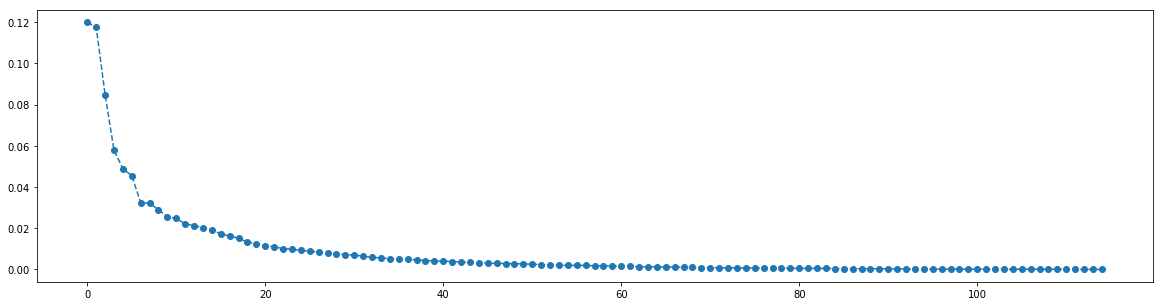

In [8]:
plt.figure(figsize=(20,5))
plt.plot(pca.explained_variance_ratio_, '--o' )
plt.show()

In [9]:
n_components = 80
variance_explained = pca.explained_variance_ratio_
print("Variance explained sum = {}, by {} components".format(variance_explained[0:n_components].sum(),n_components))

Variance explained sum = 0.9925901068810212, by 80 components


In [10]:
#using above plot we can take n_component = 3 as it explains most of the variance 
pca = PCA(n_components=n_components)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca_data_std = pca.transform(data_std)


In [12]:
pca_row, pca_col = pca_data_std.shape
column_label = []
for i in range(1, pca_col+1):
    column_label.append('PCA_{}'.format(i))


In [13]:
pca_data_df = pd.DataFrame(pca_data_std, columns=column_label, index=data.index)
pca_data_df.head()

PCA_1      PCA_2     PCA_3      PCA_4     PCA_5     PCA_6     PCA_7  \
0 -9.001923  11.284240 -2.600963  10.334265  8.342873 -5.816654  4.728555   
1 -8.222284  12.322233 -3.552264   7.768214  5.684211 -4.451503  2.925876   
2 -7.329545  12.766361 -3.105881   4.778118  3.868912 -3.131286  6.311962   
3 -6.904154  12.488179 -1.120637   2.204894  2.514807 -5.181294  4.423406   
4 -5.809654  11.916711 -2.117423   0.377609  2.722541 -7.239696  0.462464   

      PCA_8     PCA_9    PCA_10    ...       PCA_71    PCA_72    PCA_73  \
0 -3.635420 -6.768116  1.424801    ...     0.423790 -0.848432  0.166146   
1 -3.489988 -4.719086  4.222925    ...    -0.491023  1.615422  0.081348   
2 -0.822176 -6.621000 -0.533423    ...    -0.110168 -0.699573  0.094681   
3  2.540535 -5.404637 -1.217771    ...     0.039491  0.641158 -0.660079   
4  1.321149 -0.392792  4.062014    ...    -0.320138  0.312757 -0.370391   

     PCA_74    PCA_75    PCA_76    PCA_77    PCA_78    PCA_79    PCA_80  
0 -0.552607 -0.290290  0.389542  0.463195 -0.188509  0.087637  0.465780  
1  0.471097  0.216558 -0.315854 -0.947065 -0.035697 -0.456048 -1.079374  
2 -0.026629  0.183015 -0.013343  0.210044  0.014650  0.124225  0.196899  
3 -0.196010  0.158858 -0.544676 -0.661567  0.749968 -0.008948  0.187211  
4  0.645594 -0.438070 -0.111957  1.154381  0.077650  0.251777  0.540061  

[5 rows x 80 columns]

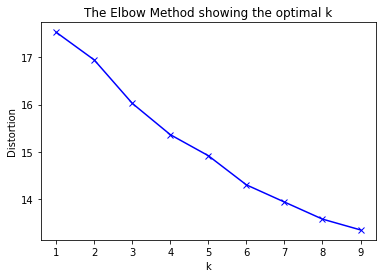

In [40]:
from scipy.spatial.distance import cdist

distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pca_data_df)
    kmeanModel.fit(pca_data_df)
    distortions.append(sum(np.min(cdist(pca_data_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_data_df.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [65]:
from sklearn.cluster import KMeans
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(pca_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
pca_data_df['cluster'] = pd.Series(kmeans.labels_, index=pca_data_df.index)

In [67]:
pca_data_df.head()

PCA_1      PCA_2     PCA_3      PCA_4     PCA_5     PCA_6     PCA_7  \
0 -9.001923  11.284240 -2.600963  10.334265  8.342873 -5.816654  4.728555   
1 -8.222284  12.322233 -3.552264   7.768214  5.684211 -4.451503  2.925876   
2 -7.329545  12.766361 -3.105881   4.778118  3.868912 -3.131286  6.311962   
3 -6.904154  12.488179 -1.120637   2.204894  2.514807 -5.181294  4.423406   
4 -5.809654  11.916711 -2.117423   0.377609  2.722541 -7.239696  0.462464   

      PCA_8     PCA_9    PCA_10   ...       PCA_72    PCA_73    PCA_74  \
0 -3.635420 -6.768116  1.424801   ...    -0.848432  0.166146 -0.552607   
1 -3.489988 -4.719086  4.222925   ...     1.615422  0.081348  0.471097   
2 -0.822176 -6.621000 -0.533423   ...    -0.699573  0.094681 -0.026629   
3  2.540535 -5.404637 -1.217771   ...     0.641158 -0.660079 -0.196010   
4  1.321149 -0.392792  4.062014   ...     0.312757 -0.370391  0.645594   

     PCA_75    PCA_76    PCA_77    PCA_78    PCA_79    PCA_80  cluster  
0 -0.290290  0.389542  0.463195 -0.188509  0.087637  0.465780        4  
1  0.216558 -0.315854 -0.947065 -0.035697 -0.456048 -1.079374        4  
2  0.183015 -0.013343  0.210044  0.014650  0.124225  0.196899        4  
3  0.158858 -0.544676 -0.661567  0.749968 -0.008948  0.187211        4  
4 -0.438070 -0.111957  1.154381  0.077650  0.251777  0.540061        4  

[5 rows x 81 columns]

In [68]:
pca_data_df.groupby(['cluster']).count()

PCA_1  PCA_2  PCA_3  PCA_4  PCA_5  PCA_6  PCA_7  PCA_8  PCA_9  \
cluster                                                                  
0           10     10     10     10     10     10     10     10     10   
1            9      9      9      9      9      9      9      9      9   
2           52     52     52     52     52     52     52     52     52   
3           32     32     32     32     32     32     32     32     32   
4           11     11     11     11     11     11     11     11     11   
5            1      1      1      1      1      1      1      1      1   

         PCA_10   ...    PCA_71  PCA_72  PCA_73  PCA_74  PCA_75  PCA_76  \
cluster           ...                                                     
0            10   ...        10      10      10      10      10      10   
1             9   ...         9       9       9       9       9       9   
2            52   ...        52      52      52      52      52      52   
3            32   ...        32      32      32      32      32      32   
4            11   ...        11      11      11      11      11      11   
5             1   ...         1       1       1       1       1       1   

         PCA_77  PCA_78  PCA_79  PCA_80  
cluster                                  
0            10      10      10      10  
1             9       9       9       9  
2            52      52      52      52  
3            32      32      32      32  
4            11      11      11      11  
5             1       1       1       1  

[6 rows x 80 columns]

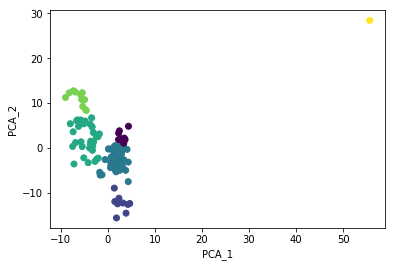

In [75]:
plt.scatter(pca_data_df.iloc[:,0], pca_data_df.iloc[:, 1], c=pca_data_df.iloc[:, -1])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()